In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
ratings_path = "../data/raw/ml-100k/u.data"

ratings = pd.read_csv(
    ratings_path,
    sep="\t",
    names=["user_id", "movie_id", "rating", "timestamp"]
)

ratings.head()


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
print("rows:", len(ratings))
print("unique users:", ratings["user_id"].nunique())
print("unique movies:", ratings["movie_id"].nunique())
ratings["rating"].value_counts().sort_index()


rows: 100000
unique users: 943
unique movies: 1682


rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64

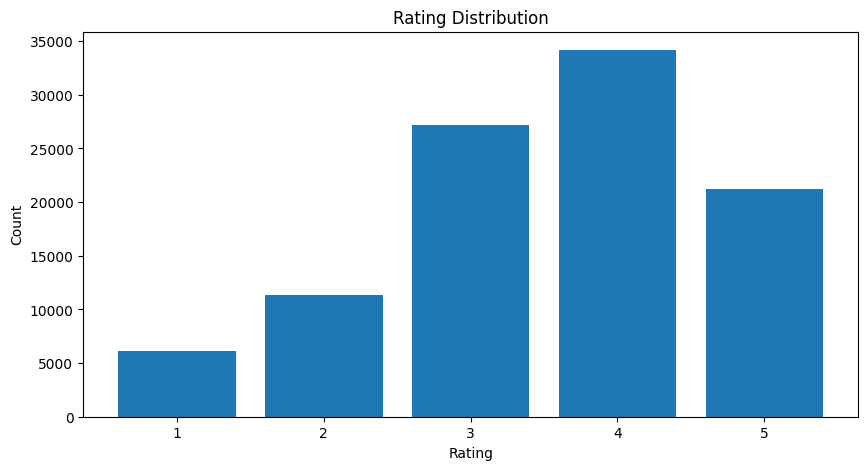

In [4]:
counts = ratings["rating"].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [5]:
movies_path = "../data/raw/ml-100k/u.item"

movies = pd.read_csv(
    movies_path,
    sep="|",
    encoding="latin-1",
    header=None
)

# u.item columns: movie_id, title, release_date, video_release_date, imdb_url, then genre flags...
movies = movies[[0, 1, 2]]
movies.columns = ["movie_id", "title", "release_date"]

movies.head()


,movie_id,title,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


In [6]:
df = ratings.merge(movies, on="movie_id", how="left")
df.head()


,user_id,movie_id,rating,timestamp,title,release_date
0,196,242,3,881250949,Kolya (1996),24-Jan-1997
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997


In [7]:
movie_stats = df.groupby("title").agg(
    num_ratings=("rating", "count"),
    avg_rating=("rating", "mean")
).sort_values("num_ratings", ascending=False)

movie_stats.head(10)


,num_ratings,avg_rating
title,,
Star Wars (1977),583,4.358491
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
"English Patient, The (1996)",481,3.656965
Scream (1996),478,3.441423
Toy Story (1995),452,3.878319
Air Force One (1997),431,3.631090


In [8]:
min_ratings = 50
best = movie_stats[movie_stats["num_ratings"] >= min_ratings].sort_values("avg_rating", ascending=False)
best.head(15)


,num_ratings,avg_rating
title,,
"Close Shave, A (1995)",112,4.491071
Schindler's List (1993),298,4.466443
"Wrong Trousers, The (1993)",118,4.466102
Casablanca (1942),243,4.456790
Wallace & Gromit: The Best of Aardman Animation (1996),67,4.447761
"Shawshank Redemption, The (1994)",283,4.445230
Rear Window (1954),209,4.387560
"Usual Suspects, The (1995)",267,4.385768
Star Wars (1977),583,4.358491
